# 1 import librairies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# 2 load data and handeling data

# for the best analyze i have to merge 2 datasets(riders as the base and trip to know the behaviors

In [ ]:
df1= pd.read_csv(r"C:\Users\ngoma\Downloads\riders.csv")
df2=pd.read_csv(r"C:\Users\ngoma\Downloads\trips_sample.csv")

In [ ]:
import pandas as pd

df1 = pd.read_csv(r"C:\Users\ngoma\Downloads\riders.csv")
df2 = pd.read_csv(r"C:\Users\ngoma\Downloads\trips_sample.csv")

# Merge using user_id
df = pd.merge(df1, df2, on='user_id', how='left')


In [ ]:
df.head()

,user_id,signup_date,loyalty_status_x,age,city_x,avg_rating_given,churn_prob,referred_by,trip_id,driver_id,...,payment_type,pickup_time,dropoff_time,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,weather,city_y,loyalty_status_y
0,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,R00001,T106163,D01035,...,Mobile Money,2024-07-02 08:28:06+02:27,2024-07-02 08:52:06+02:27,-1.307784,36.917165,-1.309664,36.951474,Sunny,Nairobi,Bronze
1,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,R00001,T060478,D01039,...,Card,2025-01-10 17:20:46+02:27,2025-01-10 17:46:46+02:27,-1.457195,36.877269,-1.438017,36.914989,Sunny,Nairobi,Bronze
2,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,R00001,T001144,D03414,...,Card,2024-09-04 00:56:02+02:27,2024-09-04 01:22:02+02:27,-1.115239,36.805339,-1.136842,36.793631,Rainy,Nairobi,Bronze
3,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,R00001,T115972,D00443,...,Mobile Money,2024-11-03 00:47:35+02:27,2024-11-03 01:22:35+02:27,-1.428764,36.619058,-1.467607,36.635416,Rainy,Nairobi,Bronze
4,R00000,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,R00001,T099452,D04500,...,Card,2024-06-10 18:04:22+02:27,2024-06-10 18:45:22+02:27,-1.155927,36.862336,-1.124086,36.855467,Sunny,Nairobi,Bronze


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50059 entries, 0 to 50058
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           50059 non-null  object 
 1   signup_date       50059 non-null  object 
 2   loyalty_status_x  50059 non-null  object 
 3   age               50059 non-null  float64
 4   city_x            50059 non-null  object 
 5   avg_rating_given  50059 non-null  float64
 6   churn_prob        50059 non-null  float64
 7   referred_by       15417 non-null  object 
 8   trip_id           50000 non-null  object 
 9   driver_id         50000 non-null  object 
 10  fare              50000 non-null  float64
 11  surge_multiplier  50000 non-null  float64
 12  tip               50000 non-null  float64
 13  payment_type      50000 non-null  object 
 14  pickup_time       50000 non-null  object 
 15  dropoff_time      50000 non-null  object 
 16  pickup_lat        50000 non-null  float6

# after analyze the infos of the data i notice that there are msssing values 

In [ ]:
df.describe()

,age,avg_rating_given,churn_prob,fare,surge_multiplier,tip,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng
count,50059.000000,50059.000000,50059.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,35.145756,4.460776,0.285753,15.370133,1.141574,0.468843,11.839391,23.958946,11.839411,23.958914
std,9.529594,0.426829,0.159054,6.101305,0.255560,1.104656,13.368108,14.567669,13.368047,14.567668
min,18.000000,2.600000,0.002934,3.600000,1.000000,0.000000,-1.786360,2.879224,-1.826719,2.836644
25%,28.302743,4.200000,0.161515,10.980000,1.000000,0.000000,-1.175808,3.500274,-1.175082,3.500762
50%,35.021160,4.500000,0.265176,14.100000,1.000000,0.000000,6.524989,31.238460,6.524550,31.237705
75%,41.632237,4.800000,0.388991,18.340000,1.200000,0.400000,29.935512,36.705713,29.936131,36.704926
max,70.000000,5.000000,0.913302,72.090000,3.800000,21.860000,30.544251,37.317090,30.590298,37.363050


In [ ]:
# the means and the 50% are almost the same like a normal distribution

In [ ]:
# handling the missing values  

In [ ]:
import pandas as pd


# 1️⃣ Fill missing values for numeric columns with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# 2️⃣ Fill missing values for categorical/object columns
# For 'referred_by' (can fill with 'None'), for other categories use mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col == 'referred_by':
        df[col] = df[col].fillna('None')
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Check if any missing values remain
print(df.isna().sum())


user_id             0
signup_date         0
loyalty_status_x    0
age                 0
city_x              0
avg_rating_given    0
churn_prob          0
referred_by         0
trip_id             0
driver_id           0
fare                0
surge_multiplier    0
tip                 0
payment_type        0
pickup_time         0
dropoff_time        0
pickup_lat          0
pickup_lng          0
dropoff_lat         0
dropoff_lng         0
weather             0
city_y              0
loyalty_status_y    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50059 entries, 0 to 50058
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           50059 non-null  object 
 1   signup_date       50059 non-null  object 
 2   loyalty_status_x  50059 non-null  object 
 3   age               50059 non-null  float64
 4   city_x            50059 non-null  object 
 5   avg_rating_given  50059 non-null  float64
 6   churn_prob        50059 non-null  float64
 7   referred_by       50059 non-null  object 
 8   trip_id           50059 non-null  object 
 9   driver_id         50059 non-null  object 
 10  fare              50059 non-null  float64
 11  surge_multiplier  50059 non-null  float64
 12  tip               50059 non-null  float64
 13  payment_type      50059 non-null  object 
 14  pickup_time       50059 non-null  object 
 15  dropoff_time      50059 non-null  object 
 16  pickup_lat        50059 non-null  float6

In [ ]:
# keeping this data(copy)
data=df.copy()

In [ ]:
# I need to drop some irrelevant columns

In [ ]:
# Drop irrelevant columns
cols_to_drop = [
    "user_id",
    "referred_by",
    "trip_id",
    "driver_id",
    "pickup_time",
    "dropoff_time",
    "pickup_lat",
    "pickup_lng",
    "dropoff_lat",
    "dropoff_lng"
]

df.drop(columns=cols_to_drop, inplace=True)


KeyError: "['user_id', 'referred_by', 'trip_id', 'driver_id', 'pickup_time', 'dropoff_time', 'pickup_lat', 'pickup_lng', 'dropoff_lat', 'dropoff_lng'] not found in axis"

In [ ]:
df.head()

,signup_date,loyalty_status_x,age,city_x,avg_rating_given,churn_prob,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y
0,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,13.87,1.0,0.61,Mobile Money,Sunny,Nairobi,Bronze
1,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,11.18,1.0,0.00,Card,Sunny,Nairobi,Bronze
2,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,23.62,1.4,0.00,Card,Rainy,Nairobi,Bronze
3,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,20.34,1.0,0.00,Mobile Money,Rainy,Nairobi,Bronze
4,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,16.89,1.0,0.00,Card,Sunny,Nairobi,Bronze


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50059 entries, 0 to 50058
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   signup_date       50059 non-null  object 
 1   loyalty_status_x  50059 non-null  object 
 2   age               50059 non-null  float64
 3   city_x            50059 non-null  object 
 4   avg_rating_given  50059 non-null  float64
 5   churn_prob        50059 non-null  float64
 6   fare              50059 non-null  float64
 7   surge_multiplier  50059 non-null  float64
 8   tip               50059 non-null  float64
 9   payment_type      50059 non-null  object 
 10  weather           50059 non-null  object 
 11  city_y            50059 non-null  object 
 12  loyalty_status_y  50059 non-null  object 
dtypes: float64(6), object(7)
memory usage: 5.0+ MB


In [ ]:
df.describe()

,age,avg_rating_given,churn_prob,fare,surge_multiplier,tip
count,50059.000000,50059.000000,50059.000000,50000.000000,50000.000000,50000.000000
mean,35.145756,4.460776,0.285753,15.370133,1.141574,0.468843
std,9.529594,0.426829,0.159054,6.101305,0.255560,1.104656
min,18.000000,2.600000,0.002934,3.600000,1.000000,0.000000
25%,28.302743,4.200000,0.161515,10.980000,1.000000,0.000000
50%,35.021160,4.500000,0.265176,14.100000,1.000000,0.000000
75%,41.632237,4.800000,0.388991,18.340000,1.200000,0.400000
max,70.000000,5.000000,0.913302,72.090000,3.800000,21.860000


In [ ]:
df.head()

,signup_date,loyalty_status_x,age,city_x,avg_rating_given,churn_prob,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y
0,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,13.87,1.0,0.61,Mobile Money,Sunny,Nairobi,Bronze
1,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,11.18,1.0,0.00,Card,Sunny,Nairobi,Bronze
2,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,23.62,1.4,0.00,Card,Rainy,Nairobi,Bronze
3,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,20.34,1.0,0.00,Mobile Money,Rainy,Nairobi,Bronze
4,2025-01-24,Bronze,34.729629,Nairobi,5.0,0.142431,16.89,1.0,0.00,Card,Sunny,Nairobi,Bronze


In [ ]:
data=df.copy()

In [ ]:
# convert date column into panda datetime
df["signup_date"]= pd.to_datetime(df["signup_date"])
# Extract the year, month,day
df['year']=df["signup_date"].dt.year
df['month']=df["signup_date"].dt.month
df['month_name']=df["signup_date"].dt.month_name()
df['quarter']=df["signup_date"].dt.quarter
## round age float to int
df['age'] = df['age'].round().astype(int)


In [ ]:
df = df.drop(columns=["signup_date"])


In [ ]:
df.head()

,loyalty_status_x,age,city_x,avg_rating_given,churn_prob,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter
0,Bronze,35,Nairobi,5.0,0.142431,13.87,1.0,0.61,Mobile Money,Sunny,Nairobi,Bronze,2025,1,January,1
1,Bronze,35,Nairobi,5.0,0.142431,11.18,1.0,0.00,Card,Sunny,Nairobi,Bronze,2025,1,January,1
2,Bronze,35,Nairobi,5.0,0.142431,23.62,1.4,0.00,Card,Rainy,Nairobi,Bronze,2025,1,January,1
3,Bronze,35,Nairobi,5.0,0.142431,20.34,1.0,0.00,Mobile Money,Rainy,Nairobi,Bronze,2025,1,January,1
4,Bronze,35,Nairobi,5.0,0.142431,16.89,1.0,0.00,Card,Sunny,Nairobi,Bronze,2025,1,January,1


In [ ]:
data=df.copy()

# 3 Exploratory data analysis

# a) univariate analysis

In [ ]:
df.columns

Index(['loyalty_status_x', 'age', 'city_x', 'avg_rating_given', 'churn_prob',
       'fare', 'surge_multiplier', 'tip', 'payment_type', 'weather', 'city_y',
       'loyalty_status_y', 'year', 'month', 'month_name', 'quarter'],
      dtype='object')

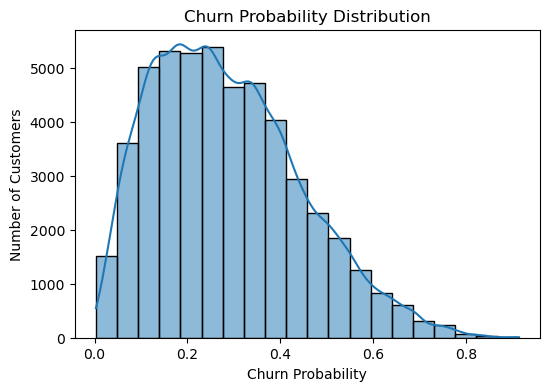

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['churn_prob'], bins=20, kde=True)
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.title('Churn Probability Distribution')
plt.show()

In [ ]:
# normal distribution

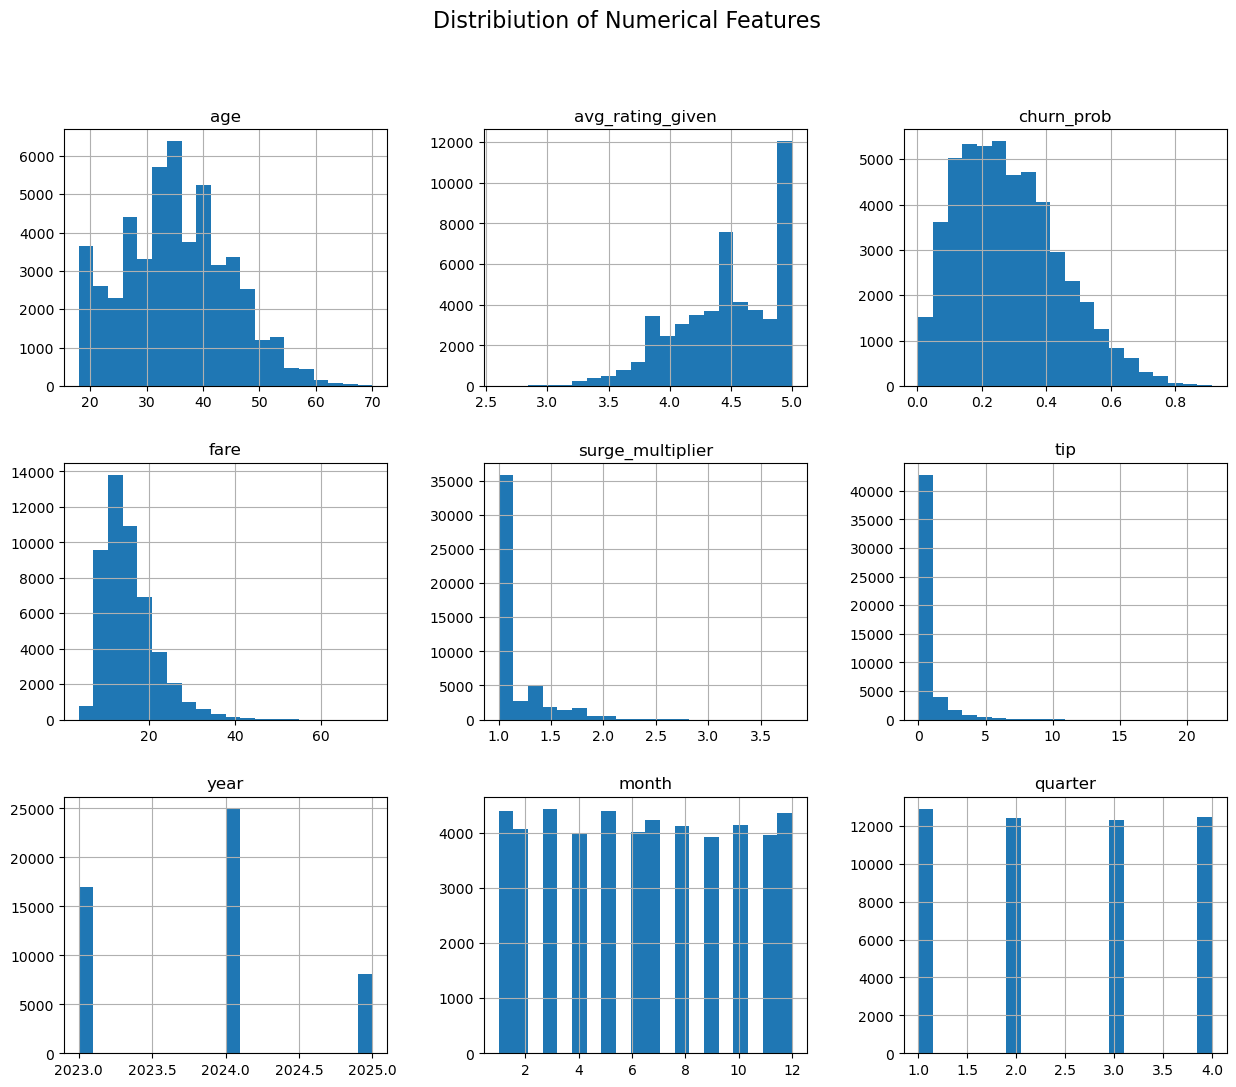

In [ ]:
# select Numeric columns
numeric_features= df.select_dtypes(include=np.number).columns.to_list()
df[numeric_features].hist(figsize=(15, 12), bins=20)
plt.suptitle("Distribiution of Numerical Features", fontsize=16)
plt.show()

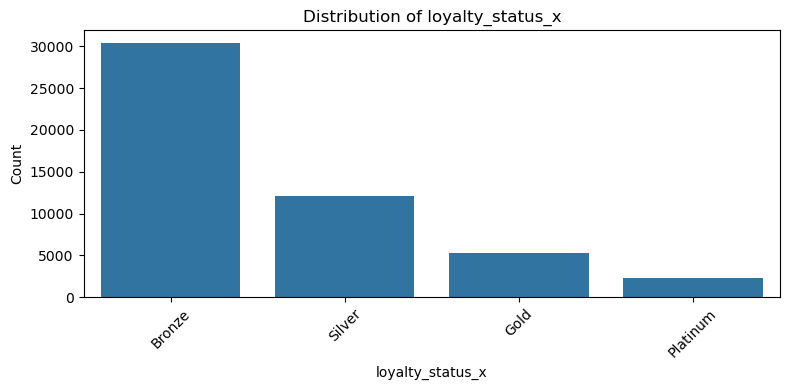

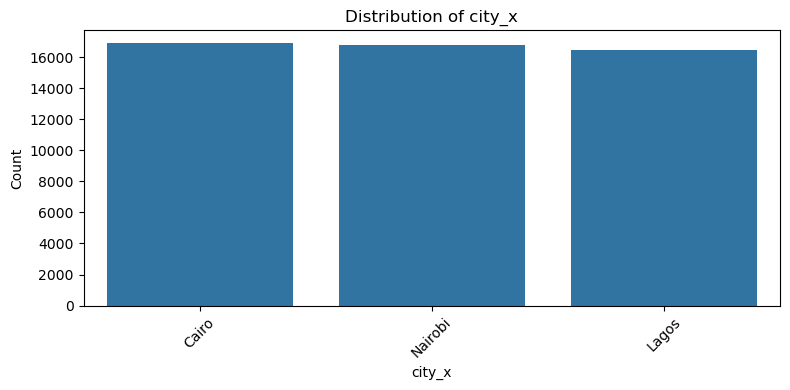

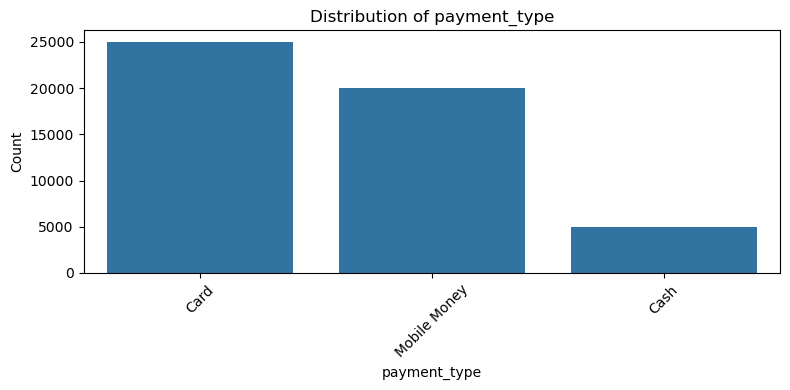

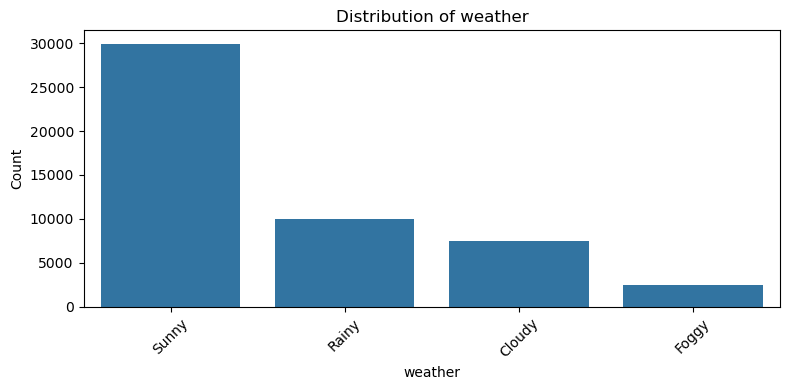

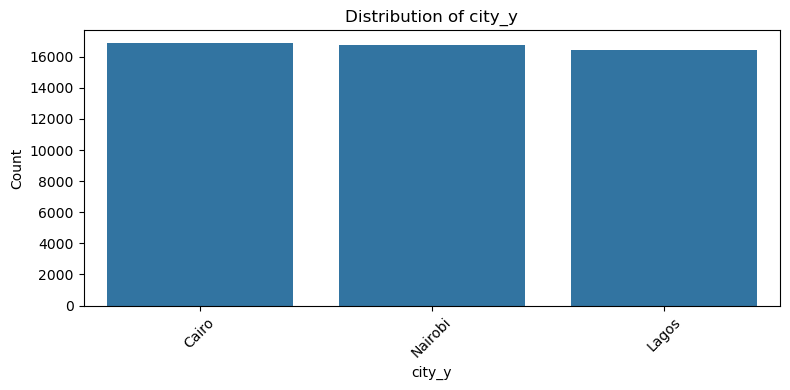

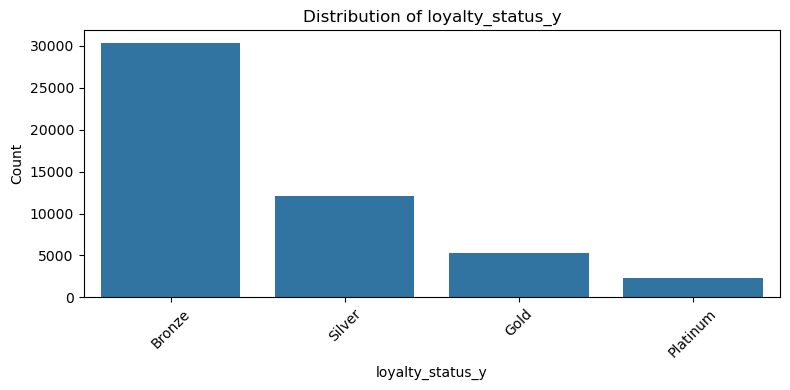

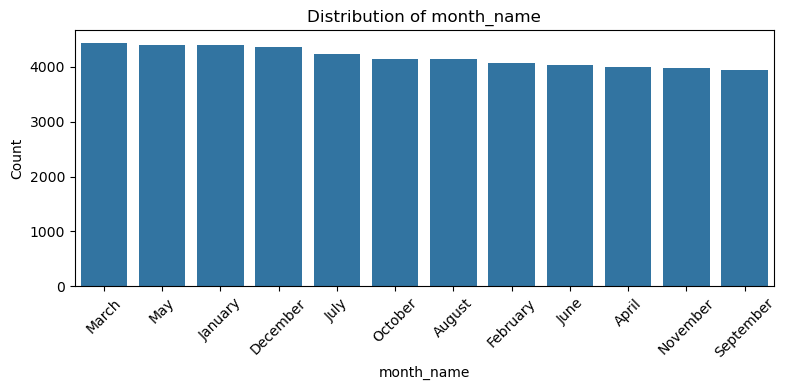

In [ ]:
categorical_features = df.select_dtypes(
    include=['object', 'category', 'bool']
).columns.tolist()

for col in categorical_features:
    plt.figure(figsize=(8,4))
    
    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index
    )
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Insight :
# - the tip:- the majority of tips are between  0 and 5
#  -age : max age is between 17 and 60 years old
#  av_rating : between 3.2 and 5
#  the fare is between 0.3 and 40 
# loyalty_status: bronz has the majority and the second is silver , gold and few for platinum
# city : cairo has mor trip with samll difference with nairobi and lagos
# payment : the majority prefere to pay by card and the second the mobile money and few use the cash
# weather : most of the travel is on sunny following by rainy time ,cloud and few during foggy period

# b) bivariate analysis

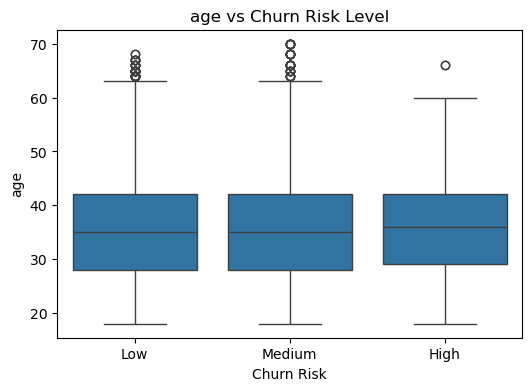

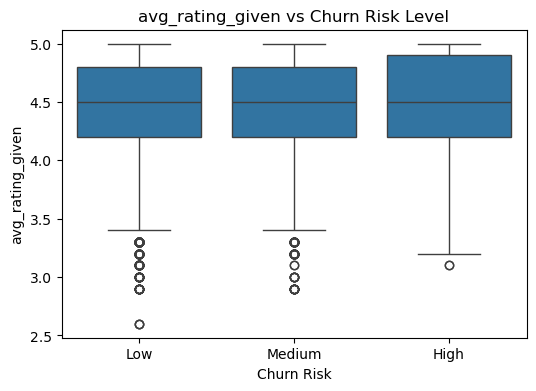

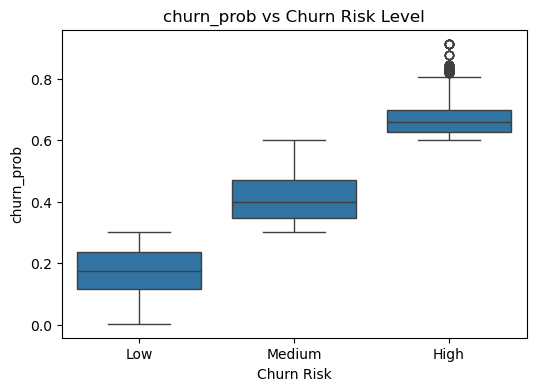

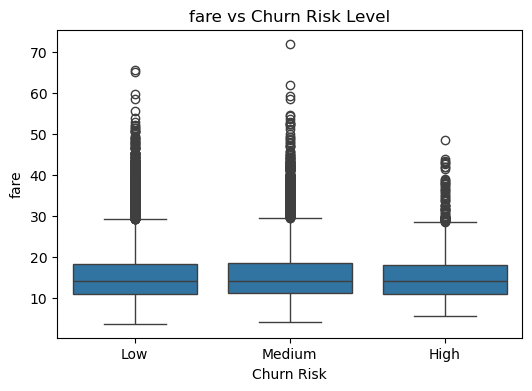

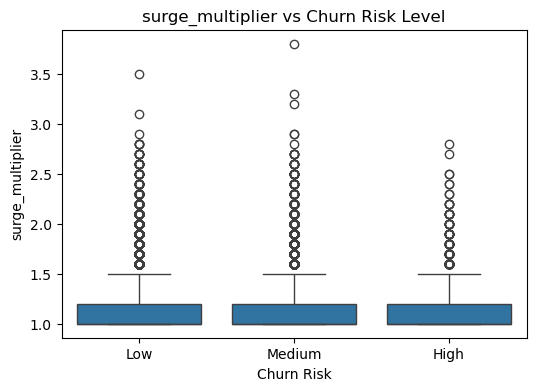

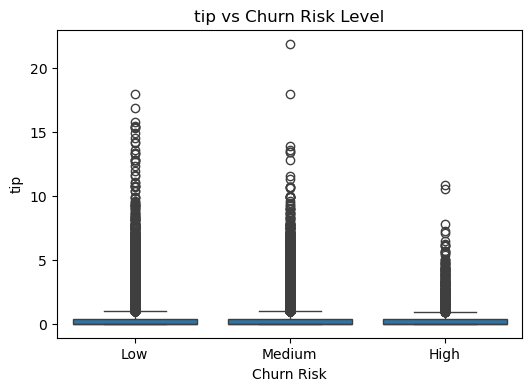

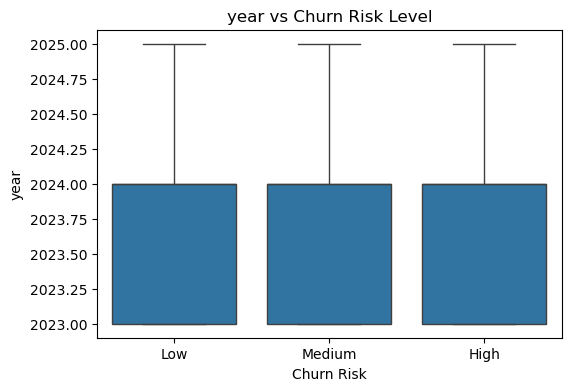

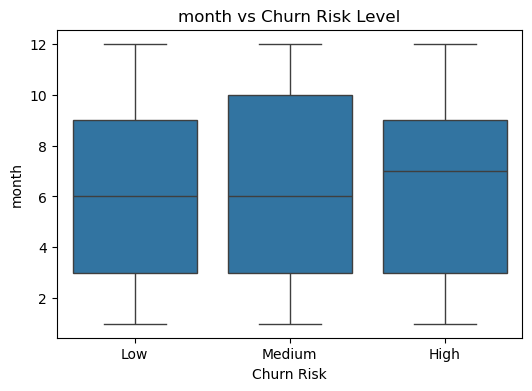

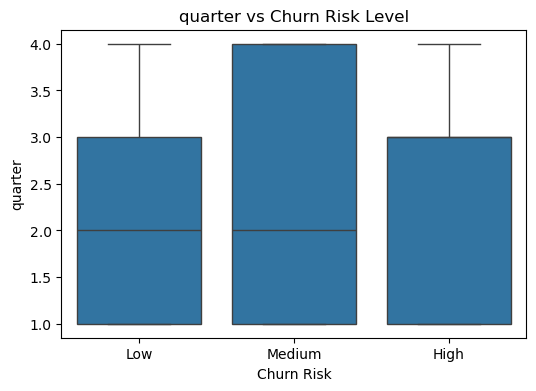

In [ ]:
df['risk_level'] = pd.cut(
    df['churn_prob'],
    bins=[0, 0.3, 0.6, 1],
    labels=['Low', 'Medium', 'High']
)

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='risk_level', y=col)
    plt.title(f'{col} vs Churn Risk Level')
    plt.xlabel('Churn Risk')
    plt.ylabel(col)
    plt.show()

# insight:
# - Avg _rating and churn_prob: risk is between 4.2 and 4.8
# -Fare and churn pred : between 11 and 19 
# -surge mulp and churn: between 1.1 and 1.3
# -tip and churn: between 0.1 and 0.9
# - year : people who travel between 2023 - beginning of 2024
# - month : between march and september

# c) Multvariate analysis

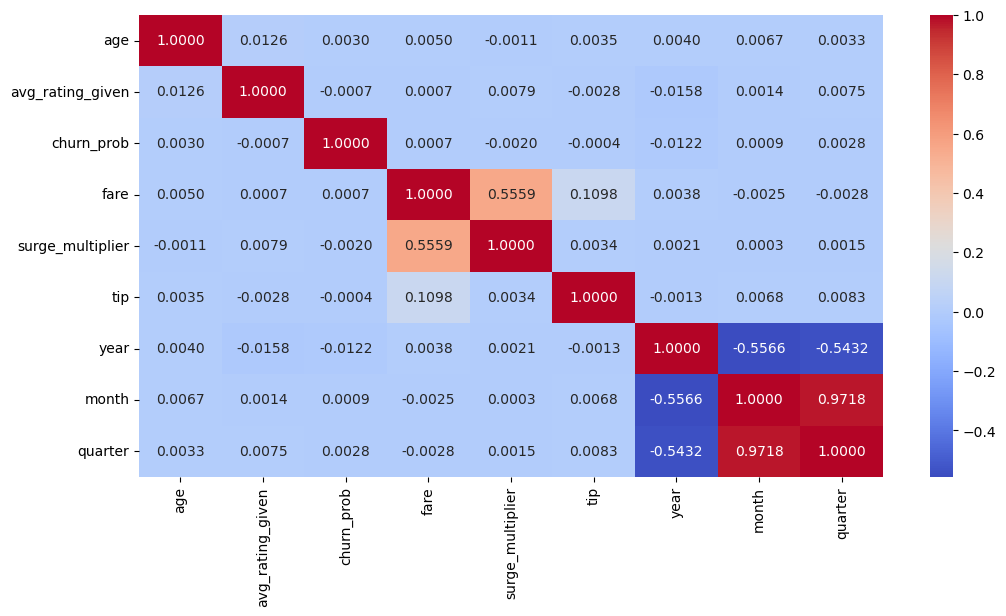

In [ ]:
correl = df[numeric_features].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(
    data=correl,
    annot=True,
    fmt='.4f',
    cmap='coolwarm'
)
plt.show()

In [ ]:
# insight

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50059 entries, 0 to 50058
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   loyalty_status_x  50059 non-null  object  
 1   age               50059 non-null  int64   
 2   city_x            50059 non-null  object  
 3   avg_rating_given  50059 non-null  float64 
 4   churn_prob        50059 non-null  float64 
 5   fare              50059 non-null  float64 
 6   surge_multiplier  50059 non-null  float64 
 7   tip               50059 non-null  float64 
 8   payment_type      50059 non-null  object  
 9   weather           50059 non-null  object  
 10  city_y            50059 non-null  object  
 11  loyalty_status_y  50059 non-null  object  
 12  year              50059 non-null  int32   
 13  month             50059 non-null  int32   
 14  month_name        50059 non-null  object  
 15  quarter           50059 non-null  int32   
 16  risk_level        5005

In [ ]:
numerical_columns=df.select_dtypes(include="number")

In [ ]:
df.head()

,loyalty_status_x,age,city_x,avg_rating_given,churn_prob,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level
0,Bronze,35,Nairobi,5.0,0.142431,13.87,1.0,0.61,Mobile Money,Sunny,Nairobi,Bronze,2025,1,January,1,Low
1,Bronze,35,Nairobi,5.0,0.142431,11.18,1.0,0.00,Card,Sunny,Nairobi,Bronze,2025,1,January,1,Low
2,Bronze,35,Nairobi,5.0,0.142431,23.62,1.4,0.00,Card,Rainy,Nairobi,Bronze,2025,1,January,1,Low
3,Bronze,35,Nairobi,5.0,0.142431,20.34,1.0,0.00,Mobile Money,Rainy,Nairobi,Bronze,2025,1,January,1,Low
4,Bronze,35,Nairobi,5.0,0.142431,16.89,1.0,0.00,Card,Sunny,Nairobi,Bronze,2025,1,January,1,Low


In [ ]:
# Step 1: Clip values to be between 0 and 1
df['churn_prob_clipped'] = df['churn_prob'].clip(0, 1)

# Step 2: Convert to binary using 0.5 threshold (you can adjust threshold if needed)
df['churn'] = (df['churn_prob_clipped'] >= 0.5).astype(int)

# Optional: check distribution
print(df['churn'].value_counts())


churn
0    44710
1     5349
Name: count, dtype: int64


In [ ]:
df = df.drop(columns=["churn_prob_clipped"])


In [ ]:
df = df.drop(columns=["churn_prob"])

In [ ]:
df.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level,churn
0,Bronze,35,Nairobi,5.0,13.87,1.0,0.61,Mobile Money,Sunny,Nairobi,Bronze,2025,1,January,1,Low,0
1,Bronze,35,Nairobi,5.0,11.18,1.0,0.00,Card,Sunny,Nairobi,Bronze,2025,1,January,1,Low,0
2,Bronze,35,Nairobi,5.0,23.62,1.4,0.00,Card,Rainy,Nairobi,Bronze,2025,1,January,1,Low,0
3,Bronze,35,Nairobi,5.0,20.34,1.0,0.00,Mobile Money,Rainy,Nairobi,Bronze,2025,1,January,1,Low,0
4,Bronze,35,Nairobi,5.0,16.89,1.0,0.00,Card,Sunny,Nairobi,Bronze,2025,1,January,1,Low,0


In [ ]:
df_copy = df.copy()

# 4 Encode categorical data

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level,churn
0,Bronze,35,Nairobi,5.0,13.87,1.0,0.61,Mobile Money,Sunny,Nairobi,Bronze,2025,1,January,1,Low,0
1,Bronze,35,Nairobi,5.0,11.18,1.0,0.00,Card,Sunny,Nairobi,Bronze,2025,1,January,1,Low,0
2,Bronze,35,Nairobi,5.0,23.62,1.4,0.00,Card,Rainy,Nairobi,Bronze,2025,1,January,1,Low,0
3,Bronze,35,Nairobi,5.0,20.34,1.0,0.00,Mobile Money,Rainy,Nairobi,Bronze,2025,1,January,1,Low,0
4,Bronze,35,Nairobi,5.0,16.89,1.0,0.00,Card,Sunny,Nairobi,Bronze,2025,1,January,1,Low,0


In [ ]:
# Initialize the encoder
encoder=LabelEncoder()

In [ ]:
encoder.fit(df["loyalty_status_x"])

LabelEncoder()

In [ ]:
# Corrected code with proper column name
df["loyalty_status_x"]=encoder.fit_transform(df["loyalty_status_x"])  # Fixed: Changed "loyalty_status_X" to "loyalty_status_x"
df["month_name"]=encoder.fit_transform(df["month_name"])
df["risk_level"]=encoder.fit_transform(df["risk_level"])
df["city_y"]=encoder.fit_transform(df["city_y"])
df["payment_type"]=encoder.fit_transform(df["payment_type"])
df["loyalty_status_y"]=encoder.fit_transform(df["loyalty_status_y"])
df["city_x"]=encoder.fit_transform(df["city_x"])
df["weather"]=encoder.fit_transform(df["weather"])

In [ ]:
df.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level,churn
0,0,35,2,5.0,13.87,1.0,0.61,2,3,2,0,2025,1,4,1,1,0
1,0,35,2,5.0,11.18,1.0,0.00,0,3,2,0,2025,1,4,1,1,0
2,0,35,2,5.0,23.62,1.4,0.00,0,2,2,0,2025,1,4,1,1,0
3,0,35,2,5.0,20.34,1.0,0.00,2,2,2,0,2025,1,4,1,1,0
4,0,35,2,5.0,16.89,1.0,0.00,0,3,2,0,2025,1,4,1,1,0


In [ ]:
df.tail(10)

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level,churn
50049,0,52,0,3.8,15.09,1.0,0.00,0,3,0,0,2024,1,4,1,1,0
50050,0,52,0,3.8,18.83,1.0,0.16,2,3,0,0,2024,1,4,1,1,0
50051,0,52,0,3.8,11.56,1.0,0.00,1,3,0,0,2024,1,4,1,1,0
50052,0,52,0,3.8,11.52,1.0,0.00,0,0,0,0,2024,1,4,1,1,0
50053,1,36,2,3.9,32.05,2.0,0.00,0,0,2,1,2025,3,7,1,2,0
50054,1,36,2,3.9,20.27,1.0,0.08,2,3,2,1,2025,3,7,1,2,0
50055,1,36,2,3.9,19.42,1.0,0.00,0,3,2,1,2025,3,7,1,2,0
50056,1,36,2,3.9,15.23,1.0,0.00,2,3,2,1,2025,3,7,1,2,0
50057,1,36,2,3.9,18.04,1.0,0.49,0,3,2,1,2025,3,7,1,2,0
50058,1,36,2,3.9,8.63,1.0,2.03,2,0,2,1,2025,3,7,1,2,0


# scale numerical features

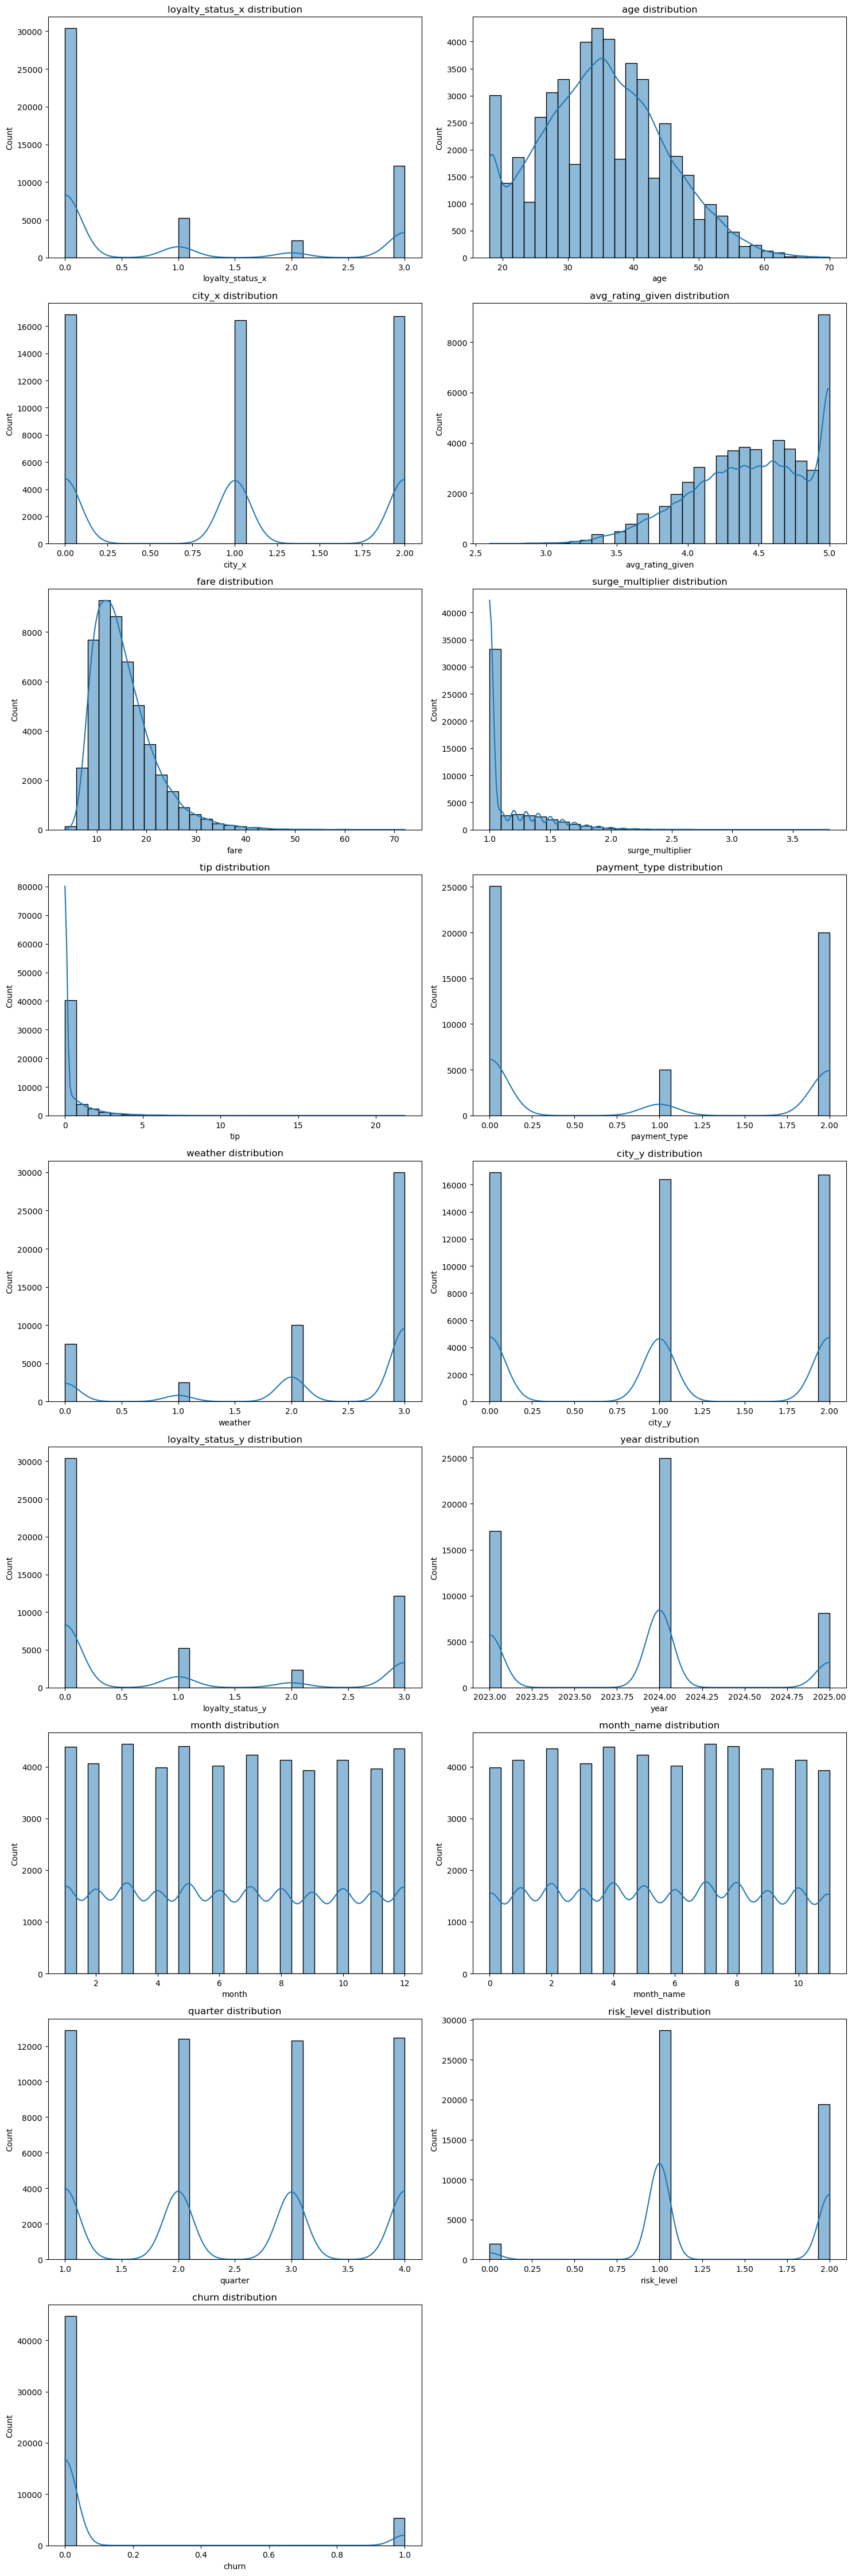

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Create the grid (adjust rows automatically)
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceil division
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
ax = ax.flatten()

for idx, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=ax[idx])
    ax[idx].set_title(f'{col} distribution')

# Hide any empty subplots
for j in range(idx+1, len(ax)):
    ax[j].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
df.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level,churn
0,0,35,2,5.0,13.87,1.0,0.61,2,3,2,0,2025,1,4,1,1,0
1,0,35,2,5.0,11.18,1.0,0.00,0,3,2,0,2025,1,4,1,1,0
2,0,35,2,5.0,23.62,1.4,0.00,0,2,2,0,2025,1,4,1,1,0
3,0,35,2,5.0,20.34,1.0,0.00,2,2,2,0,2025,1,4,1,1,0
4,0,35,2,5.0,16.89,1.0,0.00,0,3,2,0,2025,1,4,1,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ["age", "avg_rating_given", "year","fare","surge_multiplier","tip","year"]

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [ ]:
df.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level,churn
0,0,-0.015425,2,1.263338,-0.245767,-0.553555,0.128347,2,3,2,0,1.719026,1,4,1,1,0
1,0,-0.015425,2,1.263338,-0.686909,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1,0
2,0,-0.015425,2,1.263338,1.353170,1.012293,-0.424134,0,2,2,0,1.719026,1,4,1,1,0
3,0,-0.015425,2,1.263338,0.815271,-0.553555,-0.424134,2,2,2,0,1.719026,1,4,1,1,0
4,0,-0.015425,2,1.263338,0.249494,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1,0


In [ ]:
# check classe distribution

In [ ]:
df["churn"].value_counts()

churn
0    44710
1     5349
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

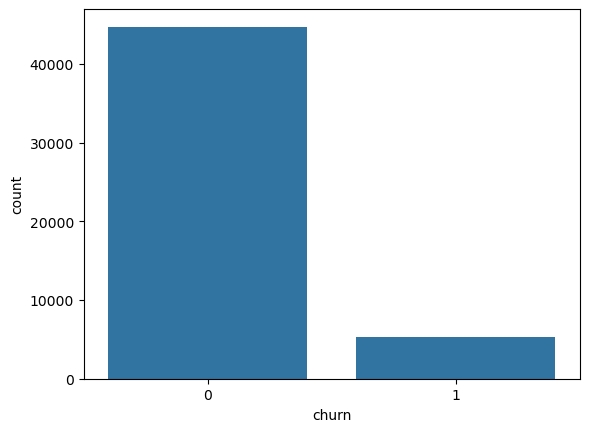

In [ ]:
sns.countplot(x='churn', data=df)


In [ ]:
df.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level,churn
0,0,-0.015425,2,1.263338,-0.245767,-0.553555,0.128347,2,3,2,0,1.719026,1,4,1,1,0
1,0,-0.015425,2,1.263338,-0.686909,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1,0
2,0,-0.015425,2,1.263338,1.353170,1.012293,-0.424134,0,2,2,0,1.719026,1,4,1,1,0
3,0,-0.015425,2,1.263338,0.815271,-0.553555,-0.424134,2,2,2,0,1.719026,1,4,1,1,0
4,0,-0.015425,2,1.263338,0.249494,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1,0


# Oversampling with smote 

In [ ]:
df.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level,churn
0,0,-0.015425,2,1.263338,-0.245767,-0.553555,0.128347,2,3,2,0,1.719026,1,4,1,1,0
1,0,-0.015425,2,1.263338,-0.686909,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1,0
2,0,-0.015425,2,1.263338,1.353170,1.012293,-0.424134,0,2,2,0,1.719026,1,4,1,1,0
3,0,-0.015425,2,1.263338,0.815271,-0.553555,-0.424134,2,2,2,0,1.719026,1,4,1,1,0
4,0,-0.015425,2,1.263338,0.249494,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1,0


In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# separate the features and the target

In [ ]:
x = df.drop(columns=["churn"])
y = df["churn"]



In [ ]:
x.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level
0,0,-0.015425,2,1.263338,-0.245767,-0.553555,0.128347,2,3,2,0,1.719026,1,4,1,1
1,0,-0.015425,2,1.263338,-0.686909,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1
2,0,-0.015425,2,1.263338,1.353170,1.012293,-0.424134,0,2,2,0,1.719026,1,4,1,1
3,0,-0.015425,2,1.263338,0.815271,-0.553555,-0.424134,2,2,2,0,1.719026,1,4,1,1
4,0,-0.015425,2,1.263338,0.249494,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [ ]:
df.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level,churn
0,0,-0.015425,2,1.263338,-0.245767,-0.553555,0.128347,2,3,2,0,1.719026,1,4,1,1,0
1,0,-0.015425,2,1.263338,-0.686909,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1,0
2,0,-0.015425,2,1.263338,1.353170,1.012293,-0.424134,0,2,2,0,1.719026,1,4,1,1,0
3,0,-0.015425,2,1.263338,0.815271,-0.553555,-0.424134,2,2,2,0,1.719026,1,4,1,1,0
4,0,-0.015425,2,1.263338,0.249494,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [ ]:
x.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level
0,0,-0.015425,2,1.263338,-0.245767,-0.553555,0.128347,2,3,2,0,1.719026,1,4,1,1
1,0,-0.015425,2,1.263338,-0.686909,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1
2,0,-0.015425,2,1.263338,1.353170,1.012293,-0.424134,0,2,2,0,1.719026,1,4,1,1
3,0,-0.015425,2,1.263338,0.815271,-0.553555,-0.424134,2,2,2,0,1.719026,1,4,1,1
4,0,-0.015425,2,1.263338,0.249494,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1


In [ ]:
from imblearn.over_sampling import SMOTE

# Make sure your features and target exist
# X = df.drop("churn", axis=1)
# y = df["churn"]

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)


In [ ]:
y_resampled.value_counts()

churn
0    44710
1    44710
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

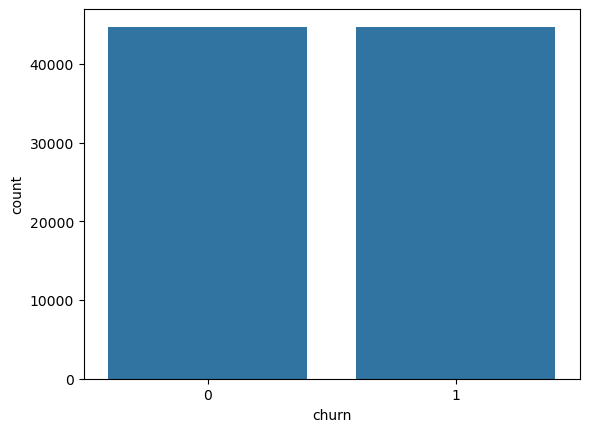

In [ ]:
# Correct function name is countplot (without 's')
sns.countplot(x=y_resampled)

In [ ]:
x.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level
0,0,-0.015425,2,1.263338,-0.245767,-0.553555,0.128347,2,3,2,0,1.719026,1,4,1,1
1,0,-0.015425,2,1.263338,-0.686909,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1
2,0,-0.015425,2,1.263338,1.353170,1.012293,-0.424134,0,2,2,0,1.719026,1,4,1,1
3,0,-0.015425,2,1.263338,0.815271,-0.553555,-0.424134,2,2,2,0,1.719026,1,4,1,1
4,0,-0.015425,2,1.263338,0.249494,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [ ]:
resampled_df=pd.DataFrame(x_resampled, columns=x.columns)

In [ ]:
resampled_df["churn"]=y_resampled

In [ ]:
resampled_df.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level,churn
0,0,-0.015425,2,1.263338,-0.245767,-0.553555,0.128347,2,3,2,0,1.719026,1,4,1,1,0
1,0,-0.015425,2,1.263338,-0.686909,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1,0
2,0,-0.015425,2,1.263338,1.353170,1.012293,-0.424134,0,2,2,0,1.719026,1,4,1,1,0
3,0,-0.015425,2,1.263338,0.815271,-0.553555,-0.424134,2,2,2,0,1.719026,1,4,1,1,0
4,0,-0.015425,2,1.263338,0.249494,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1,0


# final data set ready now
# save the dataset

In [ ]:
resampled_df.to_csv('cleaned_customer churn.csv', index=False)

In [ ]:
df=pd.read_csv("cleaned_customer churn.csv")

In [ ]:
df["churn"].value_counts()

churn
0    44710
1    44710
Name: count, dtype: int64

# Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)


In [ ]:
print(f"Training data size: {len(x_train)}")
print(f"Testing data size: {len(x_test)}")



Training data size: 71536
Testing data size: 17884


In [ ]:
y_test.value_counts(normalize=True) * 100


churn
0    50.0
1    50.0
Name: proportion, dtype: float64

# Model selection(logistic regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Model Initialization
model=LogisticRegression(random_state=42)

In [ ]:
# Model Training
model.fit(x_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(x_test)


In [ ]:
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
x_test


,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level
42619,0,0.614063,0,-0.142392,-0.214608,-0.553555,-0.424134,2,3,0,0,0.259887,3,7,1,1
55107,0,0.224180,1,0.733028,-0.023132,1.152474,-0.424134,0,2,1,0,-1.199252,7,5,3,0
30964,3,2.922188,2,-1.313833,3.070182,2.186679,4.973872,0,2,2,3,1.719026,3,7,1,1
45960,3,0.404234,2,1.029049,2.148538,0.620831,-0.424134,1,2,2,3,0.259887,9,11,3,2
48227,0,-1.798976,2,1.263338,-1.059174,-0.553555,1.160851,2,1,2,0,1.719026,3,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10660,1,-1.798976,2,0.560473,-0.991937,-0.553555,0.608371,2,3,2,1,0.259887,11,9,4,1
2557,0,-0.120340,1,0.560473,-0.609832,-0.553555,-0.424134,0,3,1,0,1.719026,2,3,1,1
37070,1,0.509149,2,0.326185,0.736554,0.229369,-0.387905,2,2,2,1,0.259887,11,9,4,1
82299,3,-1.243629,2,-0.720304,2.467253,0.198050,3.568577,1,2,2,3,-0.187580,9,10,3,1


In [ ]:
y_pred[:7]

array([1, 1, 0, 0, 0, 1, 1])

In [ ]:
print(y_test[:7])

42619    0
55107    1
30964    0
45960    0
48227    1
328      0
56741    1
Name: churn, dtype: int64


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
report=classification_report(y_test, y_pred)
matrix= confusion_matrix(y_test,y_pred)

In [ ]:
print("Logistic Regression Classification Report")
print(report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.53      0.54      0.54      8942
           1       0.54      0.53      0.53      8942

    accuracy                           0.54     17884
   macro avg       0.54      0.54      0.54     17884
weighted avg       0.54      0.54      0.54     17884



In [ ]:
y_test.value_counts()

churn
0    8942
1    8942
Name: count, dtype: int64

In [ ]:
df.to_csv("Predicchurn_dataset.csv", index=False)


# Model(k-means)


In [ ]:
# use the elbow methode for to decide the number of cluster

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Elbow methode 

In [ ]:
wcss= [] # with clusters sum of squares

for k in range (1, 11):
    model= KMeans(n_clusters=k, random_state=42)
    model.fit(df)
    wcss.append(model.inertia_)

In [ ]:
wcss

[3409245.8704631617,
 2424703.656476928,
 1849368.8176805242,
 1459802.0442228045,
 1383069.2283527064,
 1316605.80770837,
 1295018.4884478175,
 1185963.0624145833,
 1119726.501080631,
 1075898.3307931316]

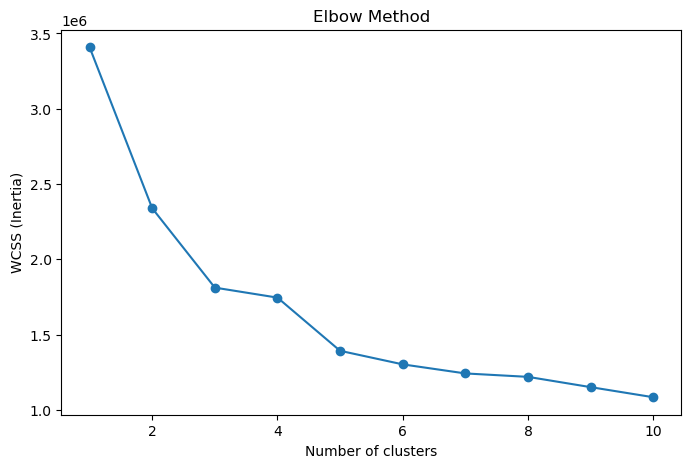

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Inertia)")
plt.show()


# Apply KMeans clustering

In [ ]:
from sklearn.cluster import KMeans

# select ONLY numeric columns
X = df.select_dtypes(include="number")

model = KMeans(n_clusters=5, random_state=42)
model.fit(X)


KMeans(n_clusters=5, random_state=42)

In [ ]:
model.labels_

array([4, 4, 4, ..., 0, 0, 1], dtype=int32)

In [ ]:
data.head()

,loyalty_status_x,age,city_x,avg_rating_given,churn_prob,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter
0,Bronze,35,Nairobi,5.0,0.142431,13.87,1.0,0.61,Mobile Money,Sunny,Nairobi,Bronze,2025,1,January,1
1,Bronze,35,Nairobi,5.0,0.142431,11.18,1.0,0.00,Card,Sunny,Nairobi,Bronze,2025,1,January,1
2,Bronze,35,Nairobi,5.0,0.142431,23.62,1.4,0.00,Card,Rainy,Nairobi,Bronze,2025,1,January,1
3,Bronze,35,Nairobi,5.0,0.142431,20.34,1.0,0.00,Mobile Money,Rainy,Nairobi,Bronze,2025,1,January,1
4,Bronze,35,Nairobi,5.0,0.142431,16.89,1.0,0.00,Card,Sunny,Nairobi,Bronze,2025,1,January,1


In [ ]:
df["cluster"]=model.labels_

In [ ]:
df.head()

,loyalty_status_x,age,city_x,avg_rating_given,fare,surge_multiplier,tip,payment_type,weather,city_y,loyalty_status_y,year,month,month_name,quarter,risk_level,churn,cluster
0,0,-0.015425,2,1.263338,-0.245767,-0.553555,0.128347,2,3,2,0,1.719026,1,4,1,1,0,4
1,0,-0.015425,2,1.263338,-0.686909,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1,0,4
2,0,-0.015425,2,1.263338,1.353170,1.012293,-0.424134,0,2,2,0,1.719026,1,4,1,1,0,4
3,0,-0.015425,2,1.263338,0.815271,-0.553555,-0.424134,2,2,2,0,1.719026,1,4,1,1,0,4
4,0,-0.015425,2,1.263338,0.249494,-0.553555,-0.424134,0,3,2,0,1.719026,1,4,1,1,0,4
